### Imports

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

### Load iPhone presentations data

In [2]:
# Read raw data
df_iphone = pd.read_csv('iPhone Events.csv')
df_iphone

,Model,Announcement date
0,iPhone,2007-01-09
1,iPhone 3G,2008-06-09
2,iPhone 3GS,2009-06-08
3,iPhone 4,2010-06-07
4,iPhone 4S,2011-10-04
5,iPhone 5,2012-09-12
6,iPhone 5S,2013-09-10
7,iPhone 6,2014-09-09
8,iPhone 6S,2015-09-09
9,iPhone 7,2016-09-07


In [3]:
# Create new columns for daily returns
df_iphone['AAPL'] = np.nan
df_iphone['^GSPC'] = np.nan

# Download AAPL and S&P500 performance for those days
for index, row in df_iphone.iterrows():
    
    # Set parameters
    tickers = ['AAPL', '^GSPC']
    start_date = df_iphone['Announcement date'][index]
    end_date_obj = datetime.strptime(start_date, "%Y-%m-%d") + timedelta(days=1)
    end_date = end_date_obj.strftime("%Y-%m-%d")

    try:
        for ticker in tickers:
            # Download data from Yahoo! Finance
            data = yf.download(tickers = ticker,      # list of tickers
                               start =start_date,     # start date
                               end =end_date,         # end date
                               interval = "1d",       # trading interval
                               prepost = False,       # download pre/post market hours data?
                               repair = True,         # repair obvious price errors e.g. 100x?
                               progress=False)        # suppress progress messages

            # Calculate daily return
            price_open = data['Open'][0]
            price_close = data['Close'][0]
            price_return = price_close/price_open-1
            df_iphone[ticker][index] = price_return
    except:
        pass
    
# Calculate spread between AAPL and S&P500
df_iphone['Spread'] = df_iphone['AAPL'] - df_iphone['^GSPC']
print("Median AAPL: ", df_iphone['AAPL'].median())
print("Median Spread: ", df_iphone['Spread'].median())

Median AAPL:  -0.008263803786862312
Median Spread:  -0.008693639383246354


In [4]:
df_iphone['AAPL'].mean()

-0.00492565741809689

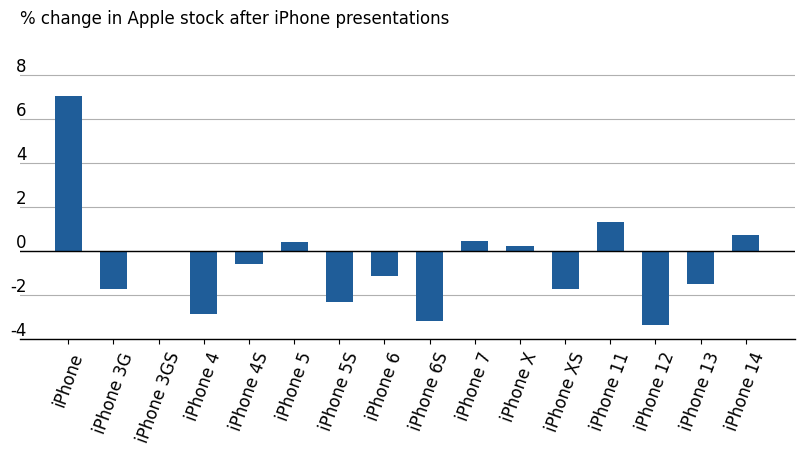

In [5]:
# Plot AAPL returns
plt.figure(figsize=(10, 4))
bar_width = 0.6
plt.bar(df_iphone['Model'], df_iphone['AAPL']*100, width=bar_width, zorder=2, color='#1f5d99') #zorder makes grid lines appear behind the bars
plt.xticks(rotation=70);
plt.grid(axis='y', linestyle='-')
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('% change in Apple stock after iPhone presentations', loc='left')
plt.xticks(fontsize=12);
plt.yticks(np.arange(-4, 10, step=2), fontsize=12);
plt.ylim([-4, 10])
plt.tick_params(axis='y', length=0, which='both', pad=-5)
plt.gca().set_yticklabels(plt.gca().get_yticks(), va='bottom');

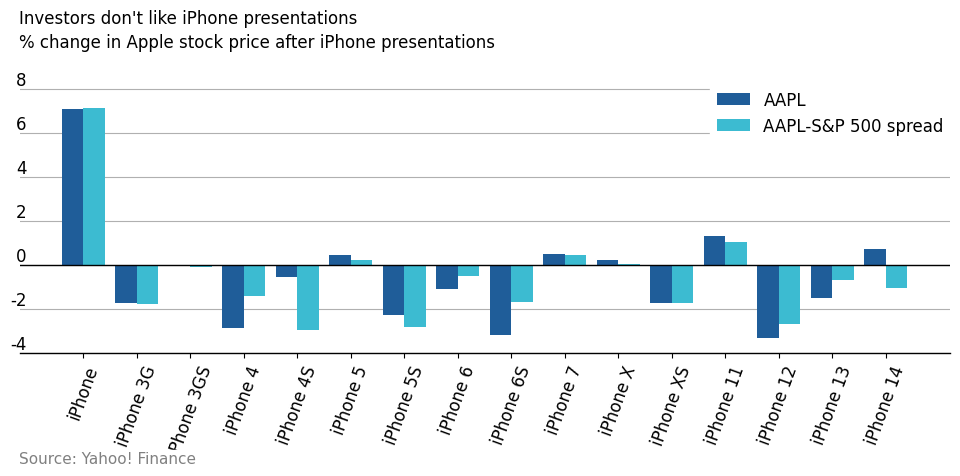

In [6]:
# Plot AAPL returns and S&P 500 spread
color_palette = ['#1f5d99','#3cbbd1','#f9a223','#007aad']
plt.figure(figsize=(12, 4))
x = np.arange(len(df_iphone['Model']))
bar_width = 0.4
x1_adjusted = x - bar_width/2
x2_adjusted = x + bar_width/2
plt.bar(x1_adjusted, df_iphone['AAPL']*100, width=bar_width, zorder=2, color=color_palette[0], label='AAPL') #zorder makes grid lines appear behind the bars
plt.bar(x2_adjusted, df_iphone['Spread']*100, width=bar_width, zorder=2, color=color_palette[1], label='AAPL-S&P 500 spread') #zorder makes grid lines appear behind the bars
plt.xticks(x, df_iphone['Model'])
plt.xticks(rotation=70);
plt.grid(axis='y', linestyle='-')
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=12);
plt.yticks(np.arange(-4, 10, step=2), fontsize=12);
plt.ylim([-4, 10])
plt.tick_params(axis='y', length=0, which='both', pad=-5)
plt.gca().set_yticklabels(plt.gca().get_yticks(), va='bottom');
font_properties = {'size': 12}
plt.legend(edgecolor='white', facecolor='white', prop=font_properties, framealpha=1, bbox_to_anchor=(0.51, 0.40, 0.5, 0.5));

# Text
title_string = "Investors don't like iPhone presentations"
subtitle_string = "% change in Apple stock price after iPhone presentations"
source_str = "Source: Yahoo! Finance"
plt.text(-1.2, 11, title_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-1.2, 9.9, subtitle_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-1.2, -9, source_str, color='#808080', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', pad=1))


#plt.savefig("plot1.png", dpi=400, bbox_inches='tight')
plt.show()

### Load WWDC presentations data

In [7]:
# Read raw data
df_wwdc = pd.read_csv('WWDC Events.csv')
df_wwdc['Year'] = df_wwdc['Year'].astype(str)
df_wwdc['Date'] = df_wwdc['Dates'].str.split('-').str[0]
df_wwdc['Date'] = df_wwdc['Date'] + ', ' + df_wwdc['Year']
df_wwdc['Date'] = pd.to_datetime(df_wwdc['Date'])
df_wwdc['Date'] = df_wwdc['Date'].dt.strftime('%Y-%m-%d')
df_wwdc = df_wwdc.drop(df_wwdc.index[-1]) # delete 2023
df_wwdc

,Year,Dates,Date
0,1990,May 7-11,1990-05-07
1,1991,May 13-17,1991-05-13
2,1992,May 11-15,1992-05-11
3,1993,May 10-14,1993-05-10
4,1994,May 16-20,1994-05-16
5,1995,May 8-12,1995-05-08
6,1996,May 13-17,1996-05-13
7,1997,May 12-16,1997-05-12
8,1998,May 11-15,1998-05-11
9,1999,May 10-14,1999-05-10


In [8]:
# Create new columns for daily returns
df_wwdc['AAPL'] = np.nan
df_wwdc['^GSPC'] = np.nan

# Download AAPL and S&P500 performance for those days
for index, row in df_wwdc.iterrows():
    
    # Set parameters
    tickers = ['AAPL', '^GSPC']
    start_date = df_wwdc['Date'][index]
    end_date_obj = datetime.strptime(start_date, "%Y-%m-%d") + timedelta(days=1)
    end_date = end_date_obj.strftime("%Y-%m-%d")

    try:
        for ticker in tickers:
            # Download data from Yahoo! Finance
            data = yf.download(tickers = ticker,      # list of tickers
                               start =start_date,     # start date
                               end =end_date,         # end date
                               interval = "1d",       # trading interval
                               prepost = False,       # download pre/post market hours data?
                               repair = True,         # repair obvious price errors e.g. 100x?
                               progress=False)        # suppress progress messages

            # Calculate daily return
            price_open = data['Open'][0]
            price_close = data['Close'][0]
            price_return = price_close/price_open-1
            df_wwdc[ticker][index] = price_return
    except:
        pass
    
# Calculate spread between AAPL and S&P500
df_wwdc['Spread'] = df_wwdc['AAPL'] - df_wwdc['^GSPC']
print("Median AAPL: ", df_wwdc['AAPL'].median())
print("Median Spread: ", df_wwdc['Spread'].median())

Median AAPL:  -0.008375966566222637
Median Spread:  -0.0076125964357469655


In [9]:
df_wwdc

,Year,Dates,Date,AAPL,^GSPC,Spread
0,1990,May 7-11,1990-05-07,0.044025,0.006324,0.037701
1,1991,May 13-17,1991-05-13,0.009569,0.002715,0.006854
2,1992,May 11-15,1992-05-11,0.004034,0.005865,-0.001831
3,1993,May 10-14,1993-05-10,0.000000,0.001040,-0.001040
4,1994,May 16-20,1994-05-16,-0.016666,0.000765,-0.017431
5,1995,May 8-12,1995-05-08,0.015673,0.007441,0.008232
6,1996,May 13-17,1996-05-13,-0.002308,0.014446,-0.016754
7,1997,May 12-16,1997-05-12,0.018115,0.015616,0.002499
8,1998,May 11-15,1998-05-11,0.002024,-0.001354,0.003378
9,1999,May 10-14,1999-05-10,-0.032086,-0.003494,-0.028591


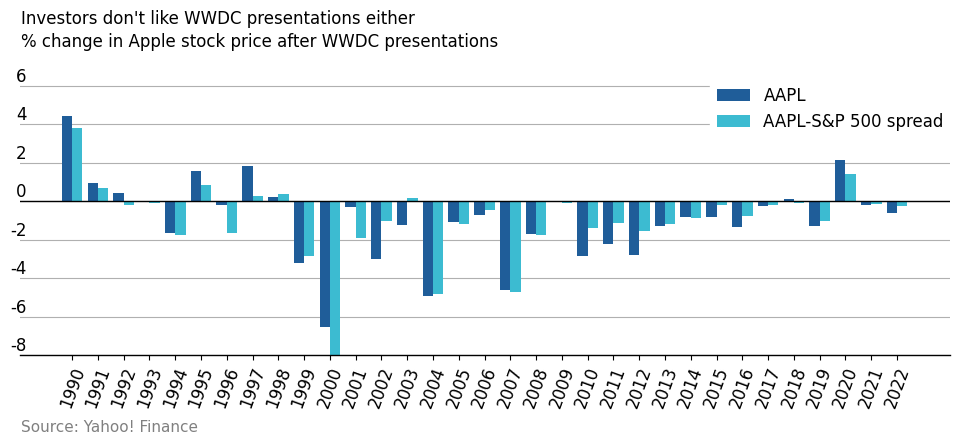

In [10]:
# Plot AAPL returns and S&P 500 spread
color_palette = ['#1f5d99','#3cbbd1','#f9a223','#007aad']
plt.figure(figsize=(12, 4))
x = np.arange(len(df_wwdc['Year']))
bar_width = 0.4
x1_adjusted = x - bar_width/2
x2_adjusted = x + bar_width/2
plt.bar(x1_adjusted, df_wwdc['AAPL']*100, width=bar_width, zorder=2, color=color_palette[0], label='AAPL') #zorder makes grid lines appear behind the bars
plt.bar(x2_adjusted, df_wwdc['Spread']*100, width=bar_width, zorder=2, color=color_palette[1], label='AAPL-S&P 500 spread') #zorder makes grid lines appear behind the bars
plt.xticks(x, df_wwdc['Year'])
plt.xticks(rotation=70);
plt.grid(axis='y', linestyle='-')
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=12);
plt.yticks(np.arange(-8, 8, step=2), fontsize=12);
plt.ylim([-8, 8])
plt.tick_params(axis='y', length=0, which='both', pad=-5)
plt.gca().set_yticklabels(plt.gca().get_yticks(), va='bottom');
font_properties = {'size': 12}
plt.legend(edgecolor='white', facecolor='white', prop=font_properties, framealpha=1, bbox_to_anchor=(0.51, 0.42, 0.5, 0.5));


# Text
title_string = "Investors don't like WWDC presentations either"
subtitle_string = "% change in Apple stock price after WWDC presentations"
source_str = "Source: Yahoo! Finance"
plt.text(-2, 9.2, title_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-2, 8, subtitle_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-2, -12, source_str, color='#808080', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', pad=1))


#plt.savefig("plot2.png", dpi=400, bbox_inches='tight')
plt.show()

In [11]:
df_iphone['AAPL'].median()*100

-0.8263803786862312

In [12]:
df_wwdc['AAPL'].median()*100

-0.8375966566222637